# SKLearn and Logistic Regression

## Outline
 - [Logistic Regression](#log)
     - [$P(Y=1)$](#prob)
     - [Loss Functions](#loss)
 - [Building a Model](#build)
 - [Plotting/Interpretation](#plot)

***

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns; sns.set()

## Logistic Regression  <a id='log'> </a>

In statistics, <b> logistic regression </b> is a model to calculate the probability of a certain class (e.g., type of flower, win/lose, pass/fail). We will motivate this discussion with a two class ($Y=0$ or $Y=1$) problem with two predictors, $x_1$ and $x_2$.

<a id='prob'> </a>
Let $p = P(Y=1)$. If we assume a linear relationship between the predictors and the log-odds, $\ell$, then we can write this down as 

$$
\ell = \log \left( \frac{p}{1-p} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2,
$$

<b> how would we think about solving for $p$? </b>
***

<b> Practice! </b> With a partner, solve for $p$ -- and write your solution into this notebook as $\alpha = \beta_0 + \beta_1 x_1 + \beta_2 x_2$,

$$ 
p = \frac{e^{\alpha}}{1+ e^{\alpha}}
$$

### Loss (or Cost) Functions  <a id='loss'> </a>

Now that we have a way to calculate $p$, we still need to find a way to update the parameters $\beta$s. We want to minimize the error (and correctly classify the observations), so we introduce the following loss (sometimes called cost) function

$$
\mathcal{L}(p, Y) = -Y \log(p) - (1-Y)\log(1-p)
$$

<b> Practice! </b> With a partner, 
   - Create a vector of 1000 probabilities (call it `pvec`) 
   - Create the loss function above in Python 
   - Run the function on the probabilities with $Y=1$ (i.e. `myloss(pvec, 1)`)
   - Plot the loss function ($p$ vs. $\mathcal{L}$).
   - Add labels and interpret what you see!

It turns out, we want to solve the following minimization problem, 
$$
    \underset{\beta_0, \beta_1, \beta_2 \in \mathbb{R}}{\min} \mathcal{L}(p,Y).
$$

There are many ways to do so but one way is to take derivatives of $\mathcal{L}$ with respect to each parameter $\beta$, setting it equal to zero, and updating our $\beta$ estimates. <b> You have done this before! </b>

## Building a Model  <a id='model'> </a>

With all of this in mind, let's build a logistic regression model for the iris data set (using only 2 predictors), <b> in order to predict the species </b>.

In [2]:
# load iris data
iris = datasets.load_iris()
#digits = datasets.load_digits()

In [3]:
# explore iris data set
# we are going to use the features to predict the target
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# what are the targets?
# these are the species we are trying to predict
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
pd_iris = pd.DataFrame(iris.data)

In [6]:
pd_iris['target'] = pd.Categorical(iris.target)

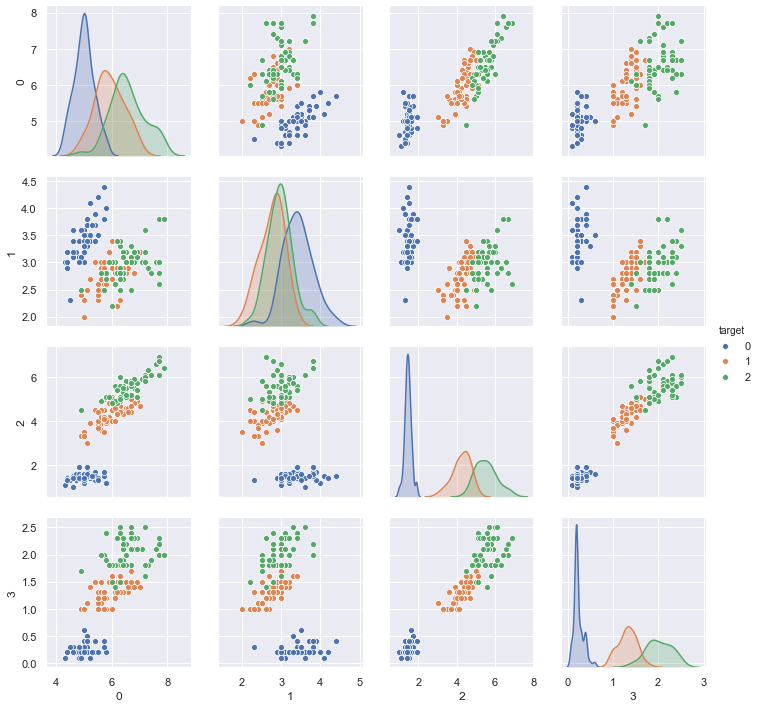

In [7]:
sns.pairplot(pd_iris, vars=pd_iris.columns[:-1], hue = 'target')

In [8]:
#import sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
# Create a smaller version of the iris data  with only 2 predictors (features)
iris_sepal = iris.data[:, 0:2]  # we only take the first two features.
Y_sepal = iris.target

In [11]:
iris_sepal.shape

(150, 2)

In [12]:
# creating a training and test split
# train_test_split is a function that takes in data, targets, test size, and random state
# outputs train features, test feat., train targets, test targets 
X_train, X_test, y_train, y_test = train_test_split(iris_sepal, Y_sepal, test_size=0.33, random_state=42)

In [22]:
# build a model (for more than 2 classes)
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)

In [23]:
# fit the model to training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# predict on test data
logreg.score(X_test, y_test)

0.82

([], <a list of 0 Text yticklabel objects>)

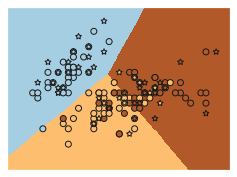

In [31]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x1_min, x1_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
x2_min, x2_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# plot the training points
plt.scatter(X_train[:, 0], X_train[:,1], c = y_train, edgecolors='k', cmap=plt.cm.Paired)
# plot test data
plt.scatter(X_test[:, 0], X_test[:,1], marker=(5,1), c = y_test, edgecolors='k', cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())